# Data 622
## Assignment 3
Mark Ly

Student ID: 00504696

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#sklearn imports
# sklearn datasets
import pandas as pd

# sklearn model selection and metrics
from sklearn.model_selection import GridSearchCV

from sklearn import metrics

# cluster
from sklearn.cluster import DBSCAN

# Creating Clusters
We will be creating 3 clusters using random data following 3 bivariate Gaussian distributions.
- Cluster 1: 1000 samples from N([1, 2], [[0.1, 0.05], [0.05, 0.2]])
- Cluster 2: 500 samples from N([0, 0], [[0.3, -0.1], [-0.1, 0.2]])
- Cluster 3: 1500 samples from N([-2, 3], [[1.5, 0], [0, 1.5]])

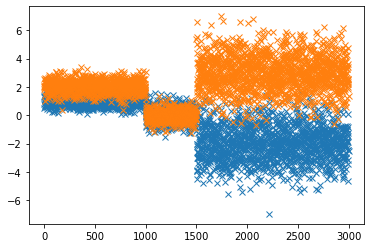

In [16]:
# creating clusters
mean1 = [1,2]
cov1 = [[0.1,0.05],[0.05,0.2]]
mean2= [0,0]
cov2 = [[0.3,-0.1],[-0.1,0.2]]
mean3 = [-2,3]
cov3 = [[1.5,0],[0,1.5]]

x1 = np.random.multivariate_normal(mean1,cov1,size=1000)
x2 = np.random.multivariate_normal(mean2,cov2,size=500)
x3 = np.random.multivariate_normal(mean3,cov3,size=1500)

X = np.vstack((x1,x2,x3))

# storing membership for each cluster
y1 = np.repeat(1,len(x1))
y2 = np.repeat(2,len(x2))
y3 = np.repeat(3,len(x3))

y = np.concatenate((y1,y2,y3))

# quick display of clusters
plt.plot(X,'x')
plt.show()


# DBSCAN
We will be preforming a DBSCAN to see how it will cluster our data. We will tune both the eps and k parameters and
evaluate each DBSCAN using the adjusted rand score. We will be using a nested for loop to go through each combination
 of eps and k to determine the best parameters to get the highest rand score.

In [17]:
from sklearn.cluster import DBSCAN

# convert to a dataframe
X = pd.DataFrame(X,columns=["x","y"])

# values for k and eps.
k = np.arange(1,11,1)
eps = np.arange(0.1,1.1,0.1).round(1)

# temp holder for rand values
rand_temp = []

# loop to for each combination for eps and k. Since there is only 100 we can print out the values
for i in k:
    for j in eps:
        dbscan = DBSCAN(eps=j, min_samples=i).fit(X)
        X['cluster'] = dbscan.labels_
        rand_temp.append([j,i,metrics.adjusted_rand_score(y, X['cluster'])])
        print("eps:",j,"k:",i,"Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(y, X['cluster']))
        del X['cluster']

eps: 0.1 k: 1 Adjusted Rand Index: 0.372
eps: 0.2 k: 1 Adjusted Rand Index: -0.023
eps: 0.3 k: 1 Adjusted Rand Index: -0.014
eps: 0.4 k: 1 Adjusted Rand Index: -0.005
eps: 0.5 k: 1 Adjusted Rand Index: -0.003
eps: 0.6 k: 1 Adjusted Rand Index: -0.002
eps: 0.7 k: 1 Adjusted Rand Index: -0.001
eps: 0.8 k: 1 Adjusted Rand Index: -0.000
eps: 0.9 k: 1 Adjusted Rand Index: -0.000
eps: 1.0 k: 1 Adjusted Rand Index: -0.000
eps: 0.1 k: 2 Adjusted Rand Index: 0.387
eps: 0.2 k: 2 Adjusted Rand Index: -0.022
eps: 0.3 k: 2 Adjusted Rand Index: -0.014
eps: 0.4 k: 2 Adjusted Rand Index: -0.005
eps: 0.5 k: 2 Adjusted Rand Index: -0.003
eps: 0.6 k: 2 Adjusted Rand Index: -0.002
eps: 0.7 k: 2 Adjusted Rand Index: -0.001
eps: 0.8 k: 2 Adjusted Rand Index: -0.000
eps: 0.9 k: 2 Adjusted Rand Index: -0.000
eps: 1.0 k: 2 Adjusted Rand Index: -0.000
eps: 0.1 k: 3 Adjusted Rand Index: 0.407
eps: 0.2 k: 3 Adjusted Rand Index: -0.021
eps: 0.3 k: 3 Adjusted Rand Index: -0.014
eps: 0.4 k: 3 Adjusted Rand Index: -0

# Best parameters
We stored the rand score in a temporary list. This will be converted to a pandas dataframe and can return the row
with the highest rand score to see which eps and k value it used.

In [18]:
rand_temp = pd.DataFrame(rand_temp,columns=['eps','k','rand'])
best_param = rand_temp[rand_temp['rand']==rand_temp['rand'].max()]
print('''
For a rand score of: {}
we have a eps of: {}
and a k of: {}'''.format(best_param['rand'].values[0].round(3),
                        best_param['eps'].values[0],
                        best_param['k'].values[0]))


For a rand score of: 0.719
we have a eps of: 0.2
and a k of: 9


# Plotting best adjusted rand score
What we are looking for is an Adjusted Rand Score that is close to 1, which means that the clustering from the DBSCAN
is close to the true clustering. The tuning parameters that gives us the highest Adjusted Rand Score (0.719) is an
eps = 0.2 and a k = 9

<AxesSubplot:xlabel='x', ylabel='y'>

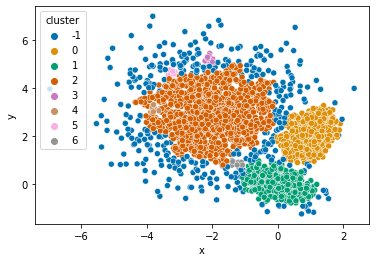

In [25]:
dbscan = DBSCAN(eps=best_param['eps'].values[0], min_samples=best_param['k'].values[0]).fit(X)
set(dbscan.labels_)
X['cluster'] = dbscan.labels_
sns.scatterplot(x="x", y="y",hue='cluster', data=X, palette='colorblind')

# Conclusion

After plotting the scatter plot from the DBScan with adjusted rand score of 0.719, eps of 0.2 and a k=9, we determined
3 large clusters and 4 smaller sub clusters. The outliers and coloured in blue with a value of -1. With the adjusted
rand score, a perfect match would return a value of 1.0. Since we have a value of 0.719, we interpret it as having
matched 71.9% of the original data.
